In [1]:
# fancy imports
# import numpy as np
import pandas as pd
# 
# import matplotlib.pyplot as plt
# 
# from pylab import rcParams
# import seaborn as sb
# 
# import scipy
# from scipy.stats.stats import pearsonr

In [2]:
# get SUM data
address = '../datasets/staandelamp_realistic.json'
data = pd.read_json(address)

data.head()

,name,state,time
0,Staande_Lamp_1,1,1509491943009
1,Staande_Lamp_2,0,1509492221471
2,Staande_Lamp_3,0,1509489940655
3,Staande_Lamp_3,1,1509492826941
4,Staande_Lamp_3,1,1509492860451


In [3]:
# # Get a 2 dimentional array from the data
# X = data['time'].values
# # X = np.reshape(X, 1)
# X = X.reshape(-1, len(X))
# X

Automatically created module for IPython interactive environment
Estimated number of clusters: 2
Estimated number of noise points: 2
Homogeneity: 0.073
Completeness: 0.217
V-measure: 0.109
Adjusted Rand Index: -0.013
Adjusted Mutual Information: -0.005
Silhouette Coefficient: 0.957
labels [ 0  0  0  0  0  0  1  0 -1  0  0  0  1  0  0 -1  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0]
unique_labels {0, 1, -1}


C:\Users\wes_v\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


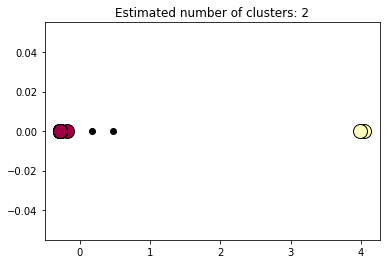

In [23]:
print(__doc__)

import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler


# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]




# X, labels_true = make_blobs(
#     n_samples=4, 
#     centers=[[1, 1], [-1, -1], [1, -1]], 
#     cluster_std=0.4, 
#     random_state=0
# )

### ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
### ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

# WRONG # X = X.reshape(-1, 1)


X = np.array([
    [ 5, 1],
    [ 6, 1],
    [ 98, 1],
    [ 17, 1],
    [ 632, 1],
    [ 22, 1],
    [ 1342327, 1],
    [ 6, 1],
    [ 234452, 1],
    [ 17, 1],
    [ 6, 1],
    [ 2332, 1],
    [ 1324327, 1],
    [ 6, 1],
    [ 242, 1],
    [ 143247, 1],
    [ 6, 1],
    [ 22, 1],
    [ 33317, 1],
    [ 63, 1],
    [ 232, 1],
    [ 17, 1],
    [ 6, 1],
    [ 22, 1],
    [ 17, 1],
    [ 6, 1],
    [ 22, 1],
    [ 17, 1],
    [ 6, 1],
    [ 22, 1],
    [ 17, 1],
    [ 6, 1],
    [ 22, 1],
    [ 17, 1],
    [ 21, 1]
])
labels_true = np.array([5, 6, 22, 17,6, 22, 17,6, 22, 17,6, 22, 17,6, 22, 6, 22, 17,6, 22, 17,17,6, 22, 17,6, 22, 17,6, 22, 17,6, 22, 17, 21])



#X = data['time'].values
#X = X.reshape(-1, 1);
#print(X)
#labels_true = data['time'].values


X = StandardScaler().fit_transform(X)

# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.2, min_samples=2, algorithm='brute', p=0.01).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.

print('labels', labels)

unique_labels = set(labels)

print('unique_labels', unique_labels)

colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [5]:
centers = [[1, 1], [-1, -1], [1, -1]]
from sklearn.datasets.samples_generator import make_blobs
X, labels_true = make_blobs(
    n_samples=4, 
    centers=[[1, 1], [-1, -1], [1, -1]], 
    cluster_std=0.4, 
    random_state=0
)

In [6]:
X

array([[ 1.39149519,  1.89635728],
       [-0.2529768 , -1.39091115],
       [ 1.38003537, -1.06054288],
       [ 1.70562094,  1.16006288]])

In [7]:
labels_true

array([0, 1, 2, 0])

In [8]:
X = np.array([[ 1.39149519,  1.89635728],
       [-0.2529768 , -1.39091115],
       [ 1.38003537, -1.06054288],
       [ 1.70562094,  1.16006288]])

labels_true = np.array([0, 1, 2, 0]);

In [9]:
X

array([[ 1.39149519,  1.89635728],
       [-0.2529768 , -1.39091115],
       [ 1.38003537, -1.06054288],
       [ 1.70562094,  1.16006288]])

In [10]:
labels_true.shape

(4,)

In [11]:
import numpy

def MyDBSCAN(D, eps, MinPts):
    """
    Cluster the dataset `D` using the DBSCAN algorithm.
    
    MyDBSCAN takes a dataset `D` (a list of vectors), a threshold distance
    `eps`, and a required number of points `MinPts`.
    
    It will return a list of cluster labels. The label -1 means noise, and then
    the clusters are numbered starting from 1.
    """
 
    # This list will hold the final cluster assignment for each point in D.
    # There are two reserved values:
    #    -1 - Indicates a noise point
    #     0 - Means the point hasn't been considered yet.
    # Initially all labels are 0.    
    labels = [0]*len(D)

    # C is the ID of the current cluster.    
    C = 0
    
    # This outer loop is just responsible for picking new seed points--a point
    # from which to grow a new cluster.
    # Once a valid seed point is found, a new cluster is created, and the 
    # cluster growth is all handled by the 'expandCluster' routine.
    
    # For each point P in the Dataset D...
    # ('P' is the index of the datapoint, rather than the datapoint itself.)
    for P in range(0, len(D)):
    
        # Only points that have not already been claimed can be picked as new 
        # seed points.    
        # If the point's label is not 0, continue to the next point.
        if not (labels[P] == 0):
           continue
        
        # Find all of P's neighboring points.
        NeighborPts = regionQuery(D, P, eps)
        
        # If the number is below MinPts, this point is noise. 
        # This is the only condition under which a point is labeled 
        # NOISE--when it's not a valid seed point. A NOISE point may later 
        # be picked up by another cluster as a boundary point (this is the only
        # condition under which a cluster label can change--from NOISE to 
        # something else).
        if len(NeighborPts) < MinPts:
            labels[P] = -1
        # Otherwise, if there are at least MinPts nearby, use this point as the 
        # seed for a new cluster.    
        else: 
           # Get the next cluster label.
           C += 1
           
           # Assing the label to our seed point.
           labels[P] = C
           
           # Grow the cluster from the seed point.
           growCluster(D, labels, P, C, eps, MinPts)
    
    # All data has been clustered!
    return labels


def growCluster(D, labels, P, C, eps, MinPts):
    """
    Grow a new cluster with label `C` from the seed point `P`.
    
    This function searches through the dataset to find all points that belong
    to this new cluster. When this function returns, cluster `C` is complete.
    
    Parameters:
      `D`      - The dataset (a list of vectors)
      `labels` - List storing the cluster labels for all dataset points
      `P`      - Index of the seed point for this new cluster
      `C`      - The label for this new cluster.  
      `eps`    - Threshold distance
      `MinPts` - Minimum required number of neighbors
    """

    # SearchQueue is a FIFO queue of points to evaluate. It will only ever 
    # contain points which belong to cluster C (and have already been labeled
    # as such).
    #
    # The points are represented by their index values (not the actual vector).
    #
    # The FIFO queue behavior is accomplished by appending new points to the
    # end of the list, and using a while-loop rather than a for-loop.
    SearchQueue = [P]

    # For each point in the queue:
    #   1. Determine whether it is a branch or a leaf
    #   2. For branch points, add their unclaimed neighbors to the search queue
    i = 0
    while i < len(SearchQueue):    
        
        # Get the next point from the queue.        
        P = SearchQueue[i]

        # Find all the neighbors of P
        NeighborPts = regionQuery(D, P, eps)
        
        # If the number of neighbors is below the minimum, then this is a leaf
        # point and we move to the next point in the queue.
        if len(NeighborPts) < MinPts:
            i += 1
            continue
        
        # Otherwise, we have the minimum number of neighbors, and this is a 
        # branch point.
            
        # For each of the neighbors...
        for Pn in NeighborPts:
           
            # If Pn was labelled NOISE during the seed search, then we
            # know it's not a branch point (it doesn't have enough 
            # neighbors), so make it a leaf point of cluster C and move on.
            if labels[Pn] == -1:
               labels[Pn] = C
            # Otherwise, if Pn isn't already claimed, claim it as part of
            # C and add it to the search queue.   
            elif labels[Pn] == 0:
                # Add Pn to cluster C.
                labels[Pn] = C
                
                # Add Pn to the SearchQueue.
                SearchQueue.append(Pn)
            
        # Advance to the next point in the FIFO queue.
        i += 1        
    
    # We've finished growing cluster C!


def regionQuery(D, P, eps):
    """
    Find all points in dataset `D` within distance `eps` of point `P`.
    
    This function calculates the distance between a point P and every other 
    point in the dataset, and then returns only those points which are within a
    threshold distance `eps`.
    """
    neighbors = []
    
    # For each point in the dataset...
    for Pn in range(0, len(D)):
        
        # If the distance is below the threshold, add it to the neighbors list.
        if numpy.linalg.norm(D[P] - D[Pn]) < eps:
           neighbors.append(Pn)
            
    return neighbors

In [22]:
def f(x):
    print('x', x)
    x.append(1)
    return x
def array_map(x):
    return np.array(list(map(f, x)))

x = data['time'].values;
print(x)
x = x.reshape(-1, 1);
print(x)
array_map(x)
# np.vectorize(f)(x)
# np.array(map(f, x))

[1509491943009 1509492221471 1509489940655 ... 1516688605054 1516687035799
 1516687453779]
[[1509491943009]
 [1509492221471]
 [1509489940655]
 ...
 [1516688605054]
 [1516687035799]
 [1516687453779]]
x [1509491943009]


AttributeError: 'numpy.ndarray' object has no attribute 'append'